## Lineare Regression für Extrusionskraft

Fit-Ergebnis:
  Gewicht[g] ≈ 0.010008 * ADC + -1838.818771
  R² = 0.9999
  Korrelationskoeffizient r = 0.999950


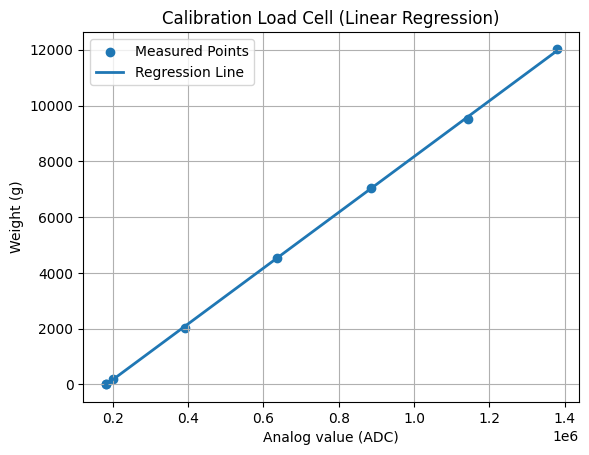

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) Messdaten eintragen
#    x = ADC / Analog read value
#    y = Gewicht in Gramm
#    >>> HIER später deine 6 Messpunkte eintragen <<<
# ---------------------------------------------------------
# 181710 = 0g
# 182923 = 11g
# 200180 = 181g
# 390900 = 2031g
# 636985 = 4531g
# 886571 = 7031
# 1144165 = 9531g
# 1378218 = 12031g

analog_values = np.array([181710, 182923, 200180, 390900, 636985, 886571, 1144165, 1378218], dtype=float)
weights_grams = np.array([0, 11, 181, 2031, 4531, 7031, 9531, 12031], dtype=float)

# ---------------------------------------------------------
# 2) Linearer Fit mit numpy.linalg.lstsq
#    Modell: y = m * x + b
# ---------------------------------------------------------
A = np.vstack([analog_values, np.ones_like(analog_values)]).T
k, b = np.linalg.lstsq(A, weights_grams, rcond=None)[0]

print("Fit-Ergebnis:")
print(f"  Gewicht[g] ≈ {k:.6f} * ADC + {b:.6f}")

# Vorhersagen für die gegebenen Punkte
y_fit = k * analog_values + b

# ---------------------------------------------------------
# 3) Güte des Fits: R² und Korrelationskoeffizient r
# ---------------------------------------------------------
ss_res = np.sum((weights_grams - y_fit) ** 2)
ss_tot = np.sum((weights_grams - np.mean(weights_grams)) ** 2)
r_squared = 1 - ss_res / ss_tot

# Pearson-Korrelationskoeffizient r
corr_matrix = np.corrcoef(analog_values, weights_grams)
r = corr_matrix[0, 1]

print(f"  R² = {r_squared:.4f}")
print(f"  Korrelationskoeffizient r = {r:.6f}")

# ---------------------------------------------------------
# 4) Plot der Messpunkte und der Fit-Gerade
# ---------------------------------------------------------
x_line = np.linspace(np.min(analog_values), np.max(analog_values), 200)
y_line = k * x_line + b

plt.figure()
plt.scatter(analog_values, weights_grams, label="Measured Points")
plt.plot(x_line, y_line, label="Regression Line", linewidth=2)

plt.xlabel("Analog value (ADC)")
plt.ylabel("Weight (g)")
plt.title("Calibration Load Cell (Linear Regression)")
plt.legend()
plt.grid(True)

# Textbox mit Fit-Gleichung, R² und r
eq_text = (f"Weight = {k:.4e} * ADC + {b:.2f}\n"f"R² = {r_squared:.4f}\n")


In [4]:
f = 10 # Frequenz in Hz

T = 1 / f
print(T)
T = 0.1
f  = 1 / T
print(f)

0.1
10.0
